<a href="https://colab.research.google.com/github/alibelhrak/NLP_Project-2024_US_Election_Sentiment_on_X/blob/Candidates/2024_US_Election_Sentiment_on_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Fin D'étude Premiére Application

* Nesta3malha bech n'importi dataset mn kaggle walla ay blassa maghir mano93ed nsob 3al locale

In [1]:
pip install opendatasets



*  US Tweets Election Dataset Loading


In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/emirhanai/2024-u-s-election-sentiment-on-x')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alibelhrak
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emirhanai/2024-u-s-election-sentiment-on-x


100%|██████████| 14.5k/14.5k [00:00<00:00, 24.6MB/s]

# Importing Libraries

 * matplotlib.pyplot as plt : Used for plotting graphs and visualizing data (eg., line charts, histograms).

* numpy as np : Supports numerical operations and array manipulation.

* pandas as pd : Handles data in tabular form (like CSV files), useful for analysis and cleaning.

* seaborn as sns : Creates attractive and informative statistical graphics, often used with pandas.

* tensorflow as tf : Framework for building and training machine learning/deep learning models.

* from tensorflow import keras : Simplifies neural network building using TensorFlow's high-level API.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading Dataset

* This Kaggle Dataset is separated into three files , training file , validarion and test file

In [4]:
df_train = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/train.csv')
df_val = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/val.csv')
df_test = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/test.csv')

* Comprehensive Candidate Coverage: Includes data on major contenders such as Kamala Harris (Democratic Party), Donald Trump (Republican Party), Jill Stein (Green Party), Chase Oliver (Libertarian Party), and Robert Kennedy (Independent).

In [5]:
df_train


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral


** We have Candidate , Party , sentiment **

In [6]:
df_train['party'].value_counts()

,count
party,
Democratic Party,100
Republican Party,100
Green Party,100
Independent,100
Libertarian Party,100


# **Data processing**

In [7]:
df_train_Party = df_train['party']
df_Val_Party = df_val['party']
df_test_Party = df_test['party']

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Instead of tokenizing party names:
tokenizer = Tokenizer(num_words=10000)  # limit vocab size
tokenizer.fit_on_texts(df_train['tweet_text'])  # tokenize tweet_texts or text

train_sequences = tokenizer.texts_to_sequences(df_train['tweet_text'])
valid_sequences = tokenizer.texts_to_sequences(df_val['tweet_text'])
test_sequences = tokenizer.texts_to_sequences(df_test['tweet_text'])

max_seq_length = 100  # consistent max length
train_padded = pad_sequences(train_sequences, maxlen=max_seq_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_seq_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_seq_length, padding='post')

# Label encoding remains the same
all_labels = pd.concat([df_train['party'], df_val['party'], df_test['party']])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

train_labels = label_encoder.transform(df_train['party'])
valid_labels = label_encoder.transform(df_val['party'])
test_labels = label_encoder.transform(df_test['party'])

onehot_encoder = OneHotEncoder(sparse_output=False)

train_labels = train_labels.reshape(-1, 1)
valid_labels = valid_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

train_onehot_labels = onehot_encoder.fit_transform(train_labels)
valid_onehot_labels = onehot_encoder.transform(valid_labels)
test_onehot_labels = onehot_encoder.transform(test_labels)


In [9]:
vocab_size = 10000
train_input = np.array(train_padded)
val_input = np.array(valid_padded)
test_input = np.array(test_padded)

train_label = np.array(train_onehot_labels)
val_label = np.array(valid_onehot_labels)
test_label = np.array(test_onehot_labels)

print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)
print("Test input shape:", test_input.shape)
print("Test label shape:", test_label.shape)


Train input shape: (500, 100)
Train label shape: (500, 5)
Validation input shape: (50, 100)
Validation label shape: (50, 5)
Test input shape: (50, 100)
Test label shape: (50, 5)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

sequence_length = 50
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=sequence_length))
model2.add(Bidirectional(LSTM(64, return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dropout(0.3))
model2.add(Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# This is optional if the model2 still shows 0 params
model2.build(input_shape=(None, sequence_length))

model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,357 (5.42 MB)

 Trainable params: 1,420,357 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [12]:
type(train_input), type(train_label)


(numpy.ndarray, numpy.ndarray)

In [13]:
history = model2.fit(
    train_input,
    train_label,
    epochs=10,
    batch_size=32,
    validation_data=(val_input, val_label),
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.3265 - loss: 1.5937 - val_accuracy: 0.7400 - val_loss: 1.4697
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8170 - loss: 1.3429 - val_accuracy: 0.8000 - val_loss: 0.7447
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8899 - loss: 0.6224 - val_accuracy: 1.0000 - val_loss: 0.1935
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1590 - val_accuracy: 1.0000 - val_loss: 0.0421
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9965 - loss: 0.0641 - val_accuracy: 0.8600 - val_loss: 0.5654
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9747 - loss: 0.1651 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 1.0000 - v

In [14]:
prediction = model2.predict(test_input)
predicted_classes = np.argmax(prediction, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step


In [15]:
y_true =test_onehot_labels
y_true_classes = np.argmax(y_true, axis=1)


In [16]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

cm = confusion_matrix(predicted_classes , y_true_classes)
cm

array([[10,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  0, 10]])

In [17]:
AS = accuracy_score(predicted_classes , y_true_classes)
AS
CR = classification_report(y_true_classes, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



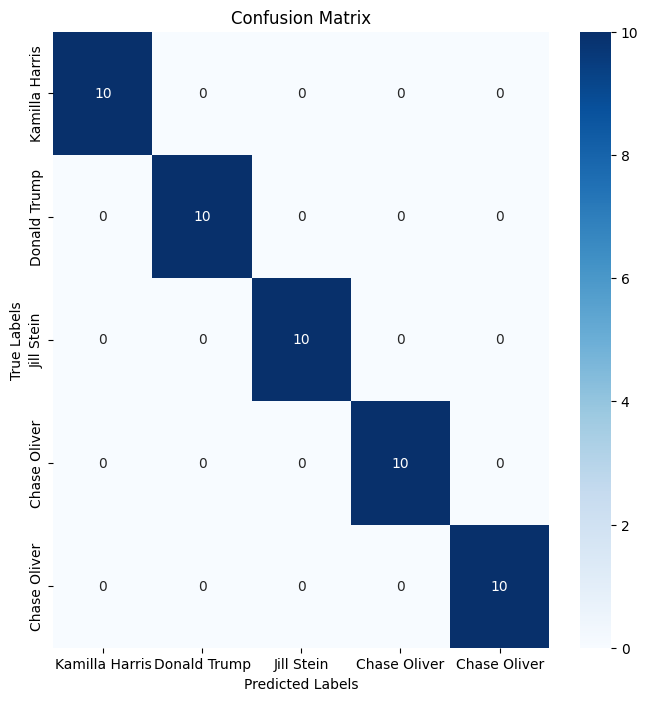

In [18]:
cm = confusion_matrix(y_true_classes, predicted_classes)

labels = ["Kamilla Harris" , "Donald Trump" , "Jill Stein" , "Chase Oliver" , "Chase Oliver"]

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Saving The Model

* Kif kif marra jeya ki bech tasti esta3ml l model elli msajel hetha
* loadih wa3ml kima t7eb tw tel9ah fi github esmo my_model2_candidate_prediction.h5

In [19]:
saved_model =model2.save('my_model2_candidate_prediction.h5')
saved_model

# saving History

In [21]:
import pickle

with open('training_history.pkl', 'wb') as f:
    pickle.dump(history, f)


# saving tokenizer

In [22]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(onehot_encoder, f)


In [25]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume tokenizer, model2, train_input, label_encoder are already defined and loaded

# Get max sequence length from training input shape
max_len = train_input.shape[1]

# Input new tweet from user
new_tweet = input('Give a new tweet: ')

# Tokenize and convert to sequence
new_seq = tokenizer.texts_to_sequences([new_tweet])
print("Tokenized sequence:", new_seq)  # Debug: check tokenized input

# Pad the sequence to max_len
new_padded = pad_sequences(new_seq, maxlen=max_len, padding='post')

# Predict with the model
prediction = model2.predict(new_padded)

# Get predicted class index (the argmax of prediction probabilities)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get party label from label encoder classes
predicted_label = label_encoder.classes_[predicted_class]
print(f"Predicted party: {predicted_label}")

label_names = {
    0: "Kamala Harris : Democratic Party",
    1: "Jill Stein : Green Party",
    2: "Robert Kennedy Jr. : Independent",
    3: "Chase Oliver : Libertarian Party",
    4: "Donald Trump : Republican Party"
}

print(f"Predicted class index: {predicted_class}")
print(f"Predicted political orientation: {label_names.get(predicted_class, 'Unknown')}")
print(f"Prediction probabilities: {prediction}")


Give a new tweet: Freedom and liberty with Chase Oliver leading.
Tokenized sequence: [[158, 62, 60, 31, 8, 16, 42]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted party: Libertarian Party
Predicted class index: 3
Predicted political orientation: Chase Oliver : Libertarian Party
Prediction probabilities: [[1.0950133e-04 3.6529591e-04 3.2383983e-04 9.9778581e-01 1.4154034e-03]]


**You can use these inputs if you want as suggestion :**
**Tweets likely for Donald Trump : Republican Party (index 4)**

"Trump is the best president we ever had."

"I support Trump for a stronger America."

"Donald Trump knows how to keep America great."

Tweets likely for Kamala Harris : Democratic Party (index 0)


"Kamala Harris is a strong and inspiring leader."

"I trust the Democratic Party to bring change."

"Go Democrats! Kamala is the future."

Tweets likely for Jill Stein : Green Party (index 1)


"We need more environmental policies like Jill Stein's."

"Green Party offers the best solutions for climate change."

Tweets likely for Robert Kennedy Jr. : Independent (index 2)


"Robert Kennedy Jr. is bringing a fresh perspective."

"Independent voices like Robert Kennedy Jr. are needed."

Tweets likely for Chase Oliver : Libertarian Party (index 3)


"Libertarian ideals are what Chase Oliver stands for."

"Freedom and liberty with Chase Oliver leading."